# Monte-Carlo Simulation for Reserves Evaluation

### Honggeun Jo, Assistant Professor, Inha University (Korea)
This demo showcases a Monte-Carlo Simulation for reserves evaluation. In chapter 8, we learned what the difference between reserves and resources, the definition of reserves, and what categories of reserves are defined (i.e., **proved**, **probable**, and **possible**). As there are lots of uncertainty in the variables related to reserves calculation, probablistic approach is commonly used and this workflow implement how Monte-Carlo can be used in estimating the amount of reserves. The workflow for this demo follows the following steps:

1. Load open source packages.
2. Define variables and their distribution.
3. Reserves computation - single realization.
4. Monte-Carlo simulation for multiple realizations.
5. Including the uncertainty of oil price to convert reserves to USD

The demo is presented by Honggeun Jo, an Assistant Professor at Inha University (Korea). You can reach out to him through his contacts on [Youtube/whghdrms](https://www.youtube.com/@whghdrms) | [GitHub/whghdrms](https://github.com/whghdrms) |  [GoogleScholar](https://scholar.google.com/citations?user=u0OE5CIAAAAJ&hl=en) | [LinkedIn](https://www.linkedin.com/in/honggeun-jo/)

## 1. Load packages

In [158]:
import pandas as pd                                      # for data curation
import matplotlib.pyplot as plt                          # for visualizations
import seaborn as sns
import numpy as np                                       # for arrays
from scipy.stats import norm, uniform, triang, lognorm   # for various distribution
import random                                            # to generate random
import warnings
warnings.filterwarnings('ignore')

## 2. Define varilable to compute reserves

Following equation shows how to compute reserves:

$Reserves = \frac{7758\cdot\phi\cdot h\cdot A\cdot(1-S_w)}{B_o}\times RF $

There are six different uncertainty variables, including 1) porosity ($\phi$), 2) pay thickness (h), 3) area (A), 4) oil/water saturation ($S_o$ or $S_w$) , 5) formation volume factor (Bo), and 6) recovery factor ($RF$). Let's assume the variables follows the distribution shown in below:
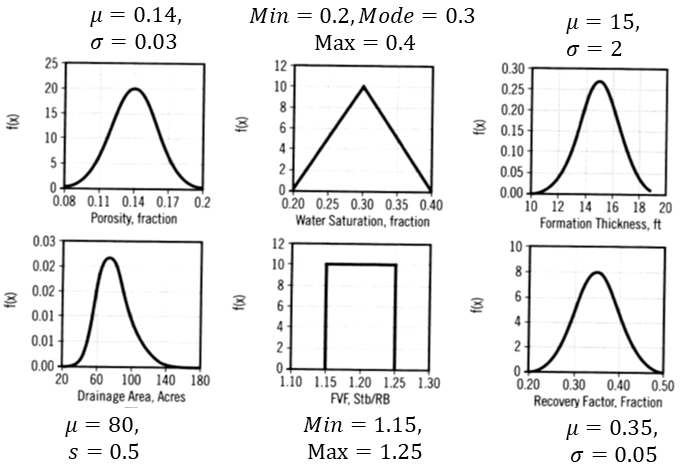

In [237]:
## Define variables and their distribution

# best estimates
poro = 0.14; s_water = 0.3; pay_thickness = 15; 
area = 80; fvf_oil = 1.2; rf = 0.35

# distribution - refer to the scipy.stats 
dist_poro = norm(loc = 0.14, scale = 0.03)
dist_s_water = triang(loc=0.2, scale= 0.2, c=0.5)
dist_pay_thickness = norm(loc = 15, scale = 2)
dist_area = lognorm(scale = 80, s = 0.5)
dist_fvf_oil = uniform(loc = 1.15, scale = 0.1)
dist_rf = norm(loc = 0.35, scale = 0.05)

## 3. Reserves computation - single realization

In [217]:
# this is definition of function to compute reserves
def reserve_computation(poro, s_water, pay_thickness, area, fvf_oil, rf):
    return 7758*poro*(1- s_water)* pay_thickness* area/fvf_oil*rf

In [218]:
# run the above function
print(f'The best estimate for reserves is {reserve_computation(poro, s_water, pay_thickness, area, fvf_oil, rf):.1f} STB')

The best estimate for reserves is 266099.4 STB


## 4. Monte-Carlo simulation for multiple realizations

In [219]:
# test for for-statement of python (please try to rerun)
print('We will repeat this for-state command for 10 times w.r.t. "i", the index for iteration\n')
for i in range(3):
    print(f'... in the {i}-iter:')
    print(f'...... my current "i" is {i}')
    print(f'...... we just generated random value =  {random.random():.4}')
    print(f'...... the end of iteration, we will continue to the {i+1}-iter \n')

We will repeat this for-state command for 10 times w.r.t. "i", the index for iteration

... in the 0-iter:
...... my current "i" is 0
...... we just generated random value =  0.07861
...... the end of iteration, we will continue to the 1-iter 

... in the 1-iter:
...... my current "i" is 1
...... we just generated random value =  0.7842
...... the end of iteration, we will continue to the 2-iter 

... in the 2-iter:
...... my current "i" is 2
...... we just generated random value =  0.654
...... the end of iteration, we will continue to the 3-iter 



In [220]:
# test for porosity RV generation (please try to rerun)
random_seed = random.random()
porosity_realization = dist_poro.ppf(random_seed)
print(f'a realization of porosity = {porosity_realization:.4f}')

a realization of porosity = 0.1475


In [221]:
# test for Sw RV generation (please try to rerun)
random_seed = random.random()
sw_realization = dist_s_water.ppf(random_seed)
print(f'a realization of Sw = {sw_realization:.4f}')

a realization of Sw = 0.2641


In [232]:
dist_poro = norm(loc = 0.14, scale = 0.03)
dist_s_water = triang(loc=0.2, scale= 0.2, c=0.5)
dist_pay_thickness = norm(loc = 15, scale = 2)
dist_area = lognorm(scale = 80, s = np.log(20))
dist_fvf_oil = uniform(loc = 1.15, scale = 0.1)
dist_rf = norm(loc = 0.35, scale = 0.05)

In [241]:
# Monte-Carlo simulation
number_of_realizations = 1000  ## define how many simulation to run
ensemble_reserves = []         ## this is a container to save output
df = pd.DataFrame(columns = ['Poro', 'Sw', 'Pay', 'Area', 'Bo', 'RF', 'Reserves'])
for i in range(number_of_realizations):
    # 1) generate random seed for each variable - between 0 and 1, uniform distribution
    random_seed_poro = random.random()
    random_seed_s_water = random.random()
    random_seed_pay_thickness = random.random()
    random_seed_area = random.random()
    random_seed_fvf_oil = random.random()
    random_seed_rf = random.random()
    
    # 2) convert random seed to random variables
    real_poro = dist_poro.ppf(random_seed_poro)
    real_s_water = dist_s_water.ppf(random_seed_s_water)
    real_pay_thickness = dist_pay_thickness.ppf(random_seed_pay_thickness)
    real_area = dist_area.ppf(random_seed_area)
    real_fvf_oil = dist_fvf_oil.ppf(random_seed_fvf_oil)
    real_rf = dist_rf.ppf(random_seed_rf)
    if real_area > 250: 
        real_area = 250
    if real_area < 20: 
        real_area = 20
    if real_poro < 0.10:
        real_poro = 0.10
        
    # 3) caluate reserves
    real_reserves = reserve_computation(real_poro, real_s_water, real_pay_thickness, real_area, real_fvf_oil, real_rf)
    
    # 4) save the outcomes to list
    ensemble_reserves.append(real_reserves)
    
    # 5) ...or save them in dataframe
    new_row = {'Poro': real_poro, 'Sw':real_s_water, 'Pay':real_pay_thickness,
               'Area':real_area, 'Bo':real_fvf_oil, 'RF':real_rf,
               'Reserves':real_reserves}
    df = df.append(new_row, ignore_index = True)

Text(0, 0.5, 'Probability')

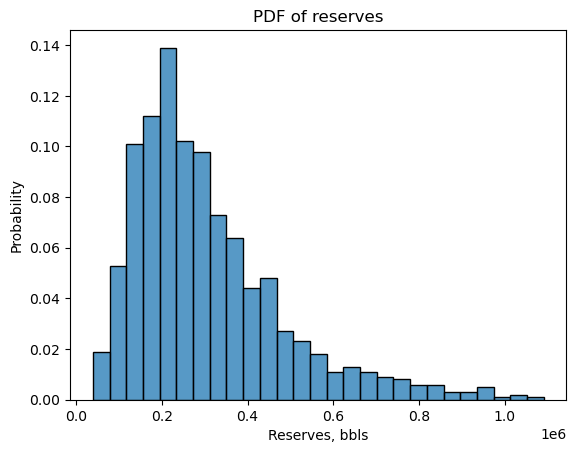

In [243]:
# visualization
sns.histplot(ensemble_reserves,stat='proportion')
plt.title('PDF of reserves')
plt.xlabel('Reserves, bbls')
plt.ylabel('Probability')

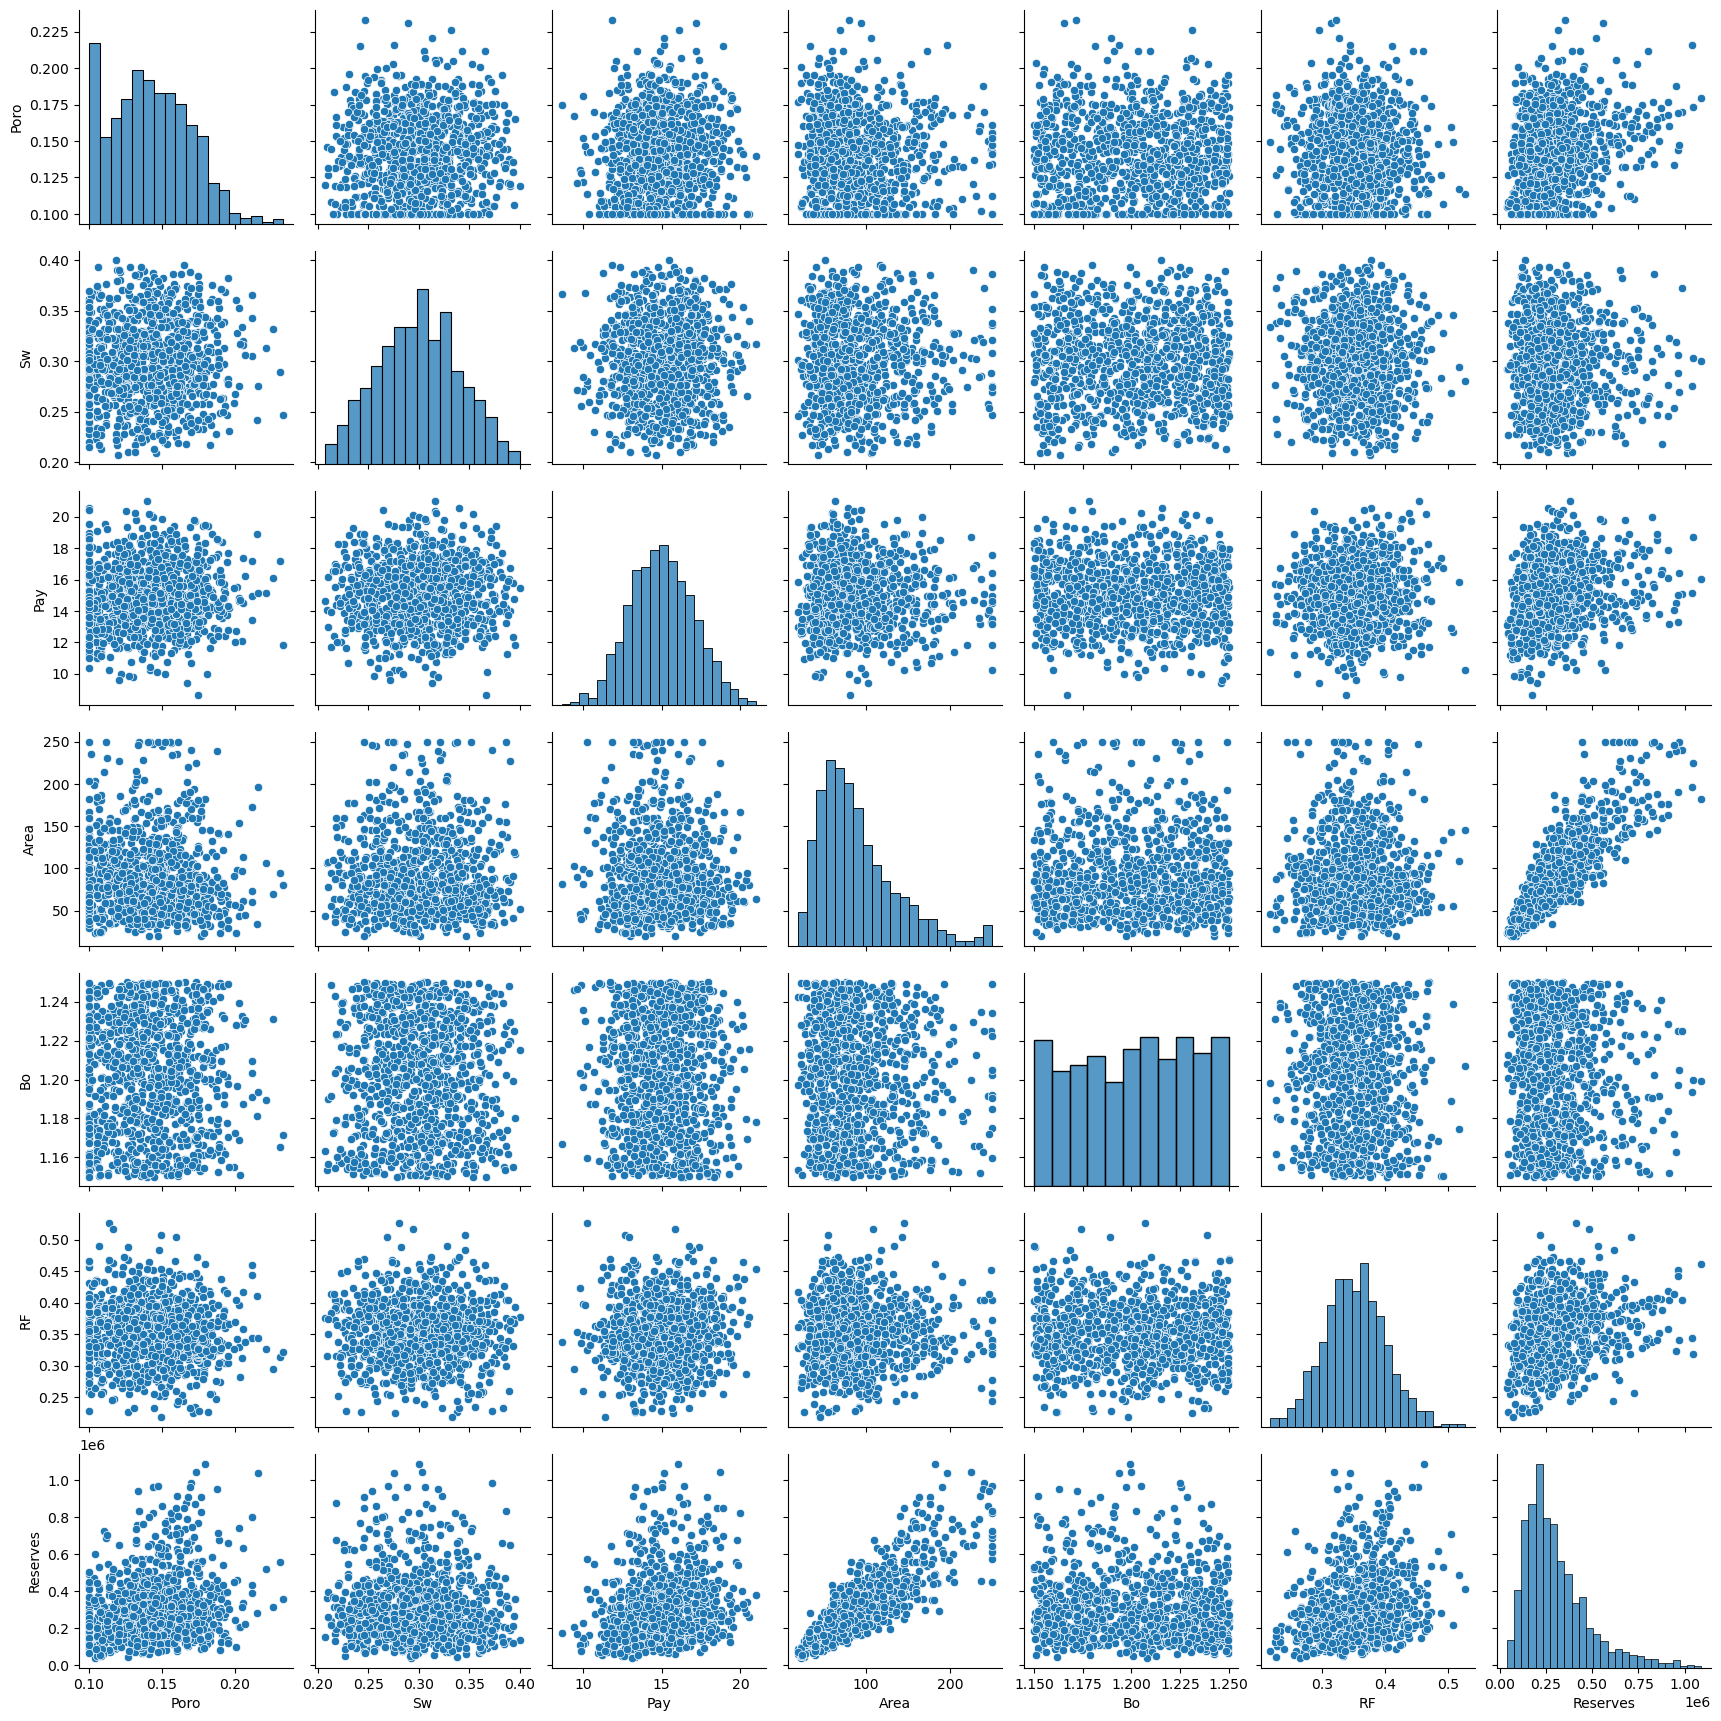

In [244]:
# visualize bivriate realizationship:
sns.pairplot(df)

In [245]:
# Statistics
df.describe()

,Poro,Sw,Pay,Area,Bo,RF,Reserves
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,0.142325,0.300118,15.001095,90.388996,1.201222,0.351802,3.055408e+05
std,0.026741,0.040509,2.027162,45.878440,0.029375,0.049501,1.768604e+05
min,0.100000,0.207425,8.635598,20.000000,1.150074,0.217770,3.881948e+04
25%,0.121674,0.270522,13.538573,57.344883,1.175188,0.318927,1.814654e+05
50%,0.141582,0.301302,14.950376,79.195188,1.202761,0.351361,2.642888e+05
75%,0.160871,0.328307,16.402313,112.993148,1.226956,0.384235,3.808949e+05
max,0.233282,0.399860,20.999095,250.000000,1.249990,0.526759,1.090618e+06


In [193]:
# save output to csv file
df.to_csv('reserves_evaluation.csv',index = False)

## 5. Including the uncertainty of oil price to convert reserves to USD


In [248]:
## will be continued in class

I hope you find this code and demonstration useful. I'm always happy to discuss any question you may find,

*Honggeun*

**Honggeun Jo**, Ph.D., P.Eng. Assistant Professor The Department of Energy Resources Engineering, Inha University (Korea).
